In [59]:
import pandas as pd

totalcattle = pd.read_csv("Data/TotalCattle.csv")
totalcattle.head()

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,SURVEY,2025,FIRST OF JAN,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CATTLE,"CATTLE, INCL CALVES - INVENTORY",TOTAL,NOT SPECIFIED,"86,662,200",NaN
1,SURVEY,2025,FIRST OF JUL,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CATTLE,"CATTLE, INCL CALVES - INVENTORY",TOTAL,NOT SPECIFIED,"94,200,000",NaN
2,SURVEY,2024,FIRST OF JAN,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CATTLE,"CATTLE, INCL CALVES - INVENTORY",TOTAL,NOT SPECIFIED,"87,157,400",NaN
3,SURVEY,2023,FIRST OF JAN,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CATTLE,"CATTLE, INCL CALVES - INVENTORY",TOTAL,NOT SPECIFIED,"88,841,000",NaN
4,SURVEY,2023,FIRST OF JUL,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CATTLE,"CATTLE, INCL CALVES - INVENTORY",TOTAL,NOT SPECIFIED,"95,400,000",NaN


<Axes: xlabel='Year'>

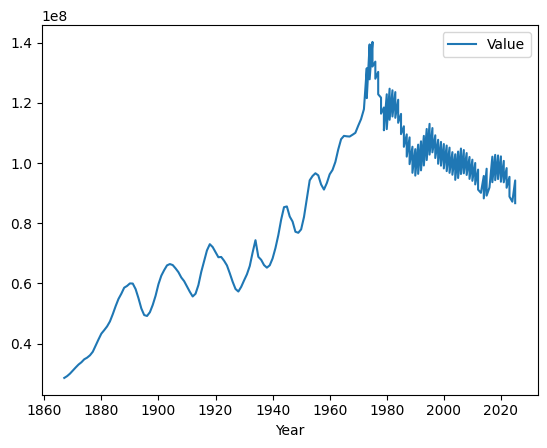

In [60]:
totalcattle['Value'] = totalcattle['Value'].str.replace(',','').astype(int)

totalcattle.plot(x="Year",y="Value")

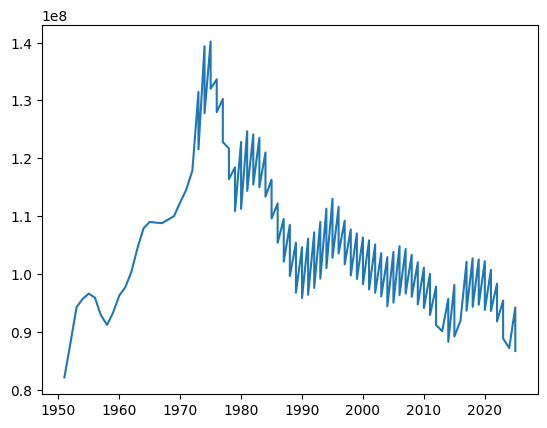

In [61]:
import matplotlib.pyplot as plt

plt.figure()
def ind(y2=1950):
    return totalcattle['Year'] > y2
plt.plot(totalcattle['Year'][ind()],totalcattle['Value'][ind()])
plt.show()

In [62]:
totalcattle[totalcattle['Year'].between(2000,2003)]

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
41,SURVEY,2003,FIRST OF JAN,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CATTLE,"CATTLE, INCL CALVES - INVENTORY",TOTAL,NOT SPECIFIED,96100000,NaN
42,SURVEY,2003,FIRST OF JUL,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CATTLE,"CATTLE, INCL CALVES - INVENTORY",TOTAL,NOT SPECIFIED,103600000,NaN
43,SURVEY,2002,FIRST OF JAN,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CATTLE,"CATTLE, INCL CALVES - INVENTORY",TOTAL,NOT SPECIFIED,96723000,NaN
44,SURVEY,2002,FIRST OF JUL,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CATTLE,"CATTLE, INCL CALVES - INVENTORY",TOTAL,NOT SPECIFIED,105100000,NaN
45,SURVEY,2001,FIRST OF JAN,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CATTLE,"CATTLE, INCL CALVES - INVENTORY",TOTAL,NOT SPECIFIED,97297500,NaN
46,SURVEY,2001,FIRST OF JUL,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CATTLE,"CATTLE, INCL CALVES - INVENTORY",TOTAL,NOT SPECIFIED,105800000,NaN
47,SURVEY,2000,FIRST OF JAN,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CATTLE,"CATTLE, INCL CALVES - INVENTORY",TOTAL,NOT SPECIFIED,98199000,NaN
48,SURVEY,2000,FIRST OF JUL,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CATTLE,"CATTLE, INCL CALVES - INVENTORY",TOTAL,NOT SPECIFIED,106300000,NaN


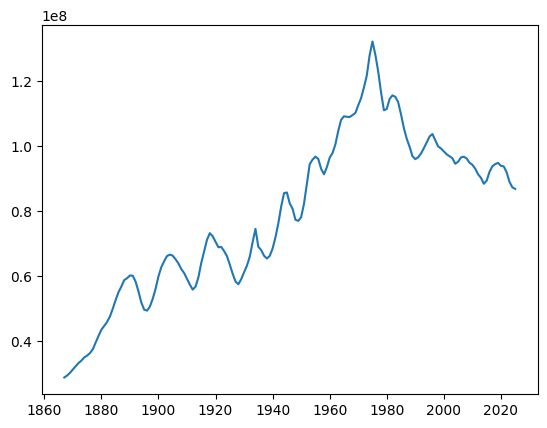

In [63]:
janind = totalcattle['Period']=="FIRST OF JAN"
plt.figure()
plt.plot(totalcattle['Year'][janind],totalcattle['Value'][janind])
plt.show()

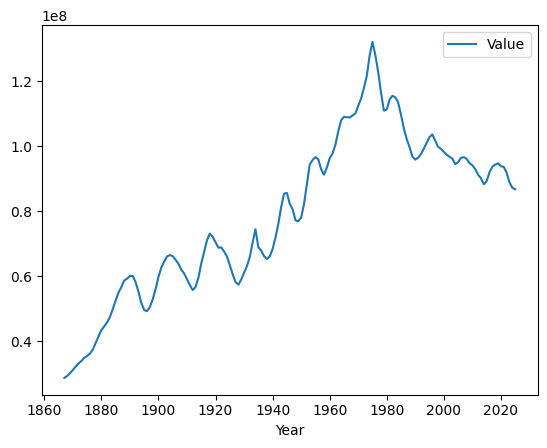

In [64]:
JanData = totalcattle[['Year','Value']][janind]
JanData.plot(x='Year',y="Value")
JanData.set_index('Year', inplace=True)

In [65]:
from statsmodels.tsa.seasonal import STL

decomposition = STL(JanData, period=20).fit()

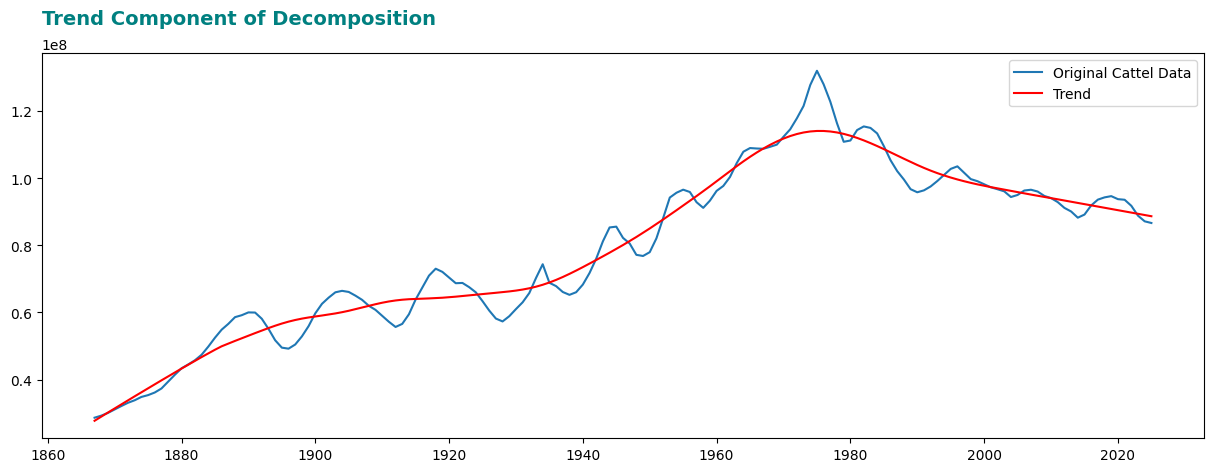

In [66]:
trend_decomposition = decomposition.trend
plt.figure(figsize=(15,5))
plt.plot(JanData,label="Original Cattel Data")
plt.plot(trend_decomposition, label="Trend", color='red')
plt.title(
    'Trend Component of Decomposition',
    loc="left",
    pad=10,
    fontdict= {
        'size': 14, 
        'color':'teal',
        'weight':'bold'
    }
)
plt.legend()
plt.show()

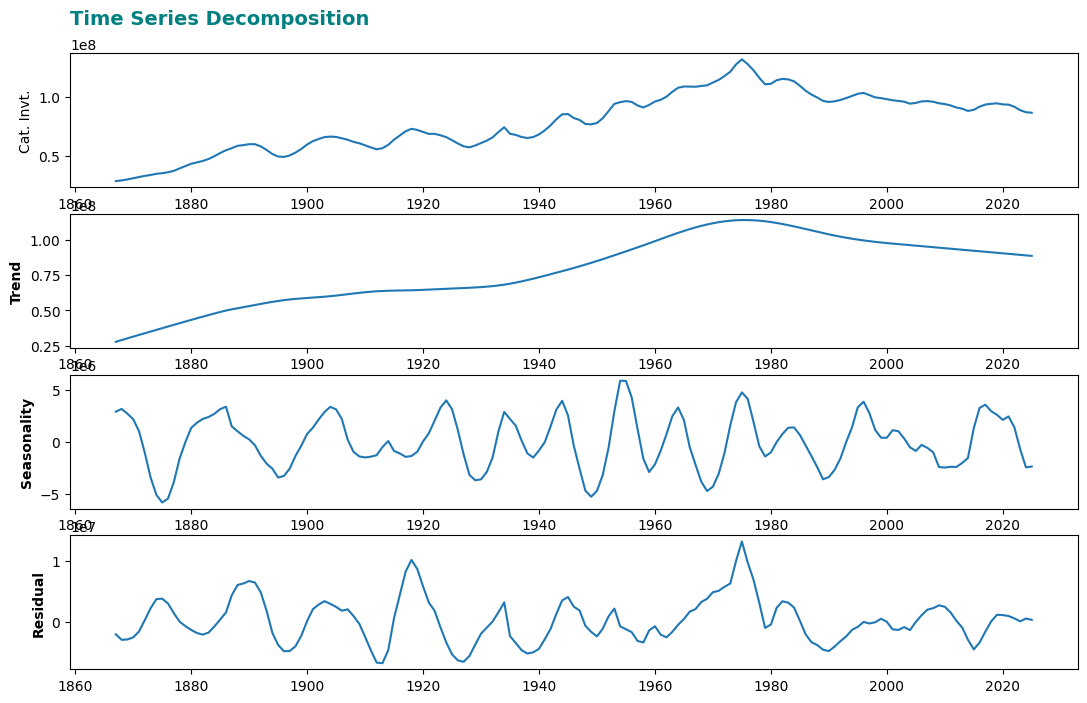

In [67]:
seasonal_decomposition = decomposition.seasonal
residual_decomposition = decomposition.resid

total_value= trend_decomposition + seasonal_decomposition + residual_decomposition

plt.figure(figsize=(13,8))
plt.subplot(4,1,1)
plt.plot(total_value)
plt.ylabel("Cat. Invt.")
plt.title(
    'Time Series Decomposition', 
    loc = 'left', 
    pad = 10, 
    fontdict = {
        'size': 14, 'color': 
        'teal', 
        'weight': 'bold'
    }
)

plt.subplot(4, 1, 2)
plt.plot(trend_decomposition)
plt.ylabel("Trend", fontdict = {'weight': 'bold'})

plt.subplot(4, 1, 3)
plt.plot(seasonal_decomposition)
plt.ylabel("Seasonality", fontdict = {'weight': 'bold'})


plt.subplot(4, 1, 4)
plt.plot(residual_decomposition)
plt.ylabel("Residual", fontdict = {'weight': 'bold'})

plt.show()

In [68]:
JanData.shape

(159, 1)

In [69]:
train, test = JanData[33:].sort_index(), JanData[:33].sort_index()
train.index = pd.to_datetime(train.index, format="%Y")
test.index = pd.to_datetime(test.index, format="%Y")
train = train.asfreq("YS")  # Year Start
test = test.asfreq("YS")

In [70]:
train['Value']

Year
1867-01-01    28636000
1868-01-01    29238000
1869-01-01    30060000
1870-01-01    31082000
1871-01-01    32107000
                ...   
1988-01-01    99621500
1989-01-01    96740200
1990-01-01    95816200
1991-01-01    96393000
1992-01-01    97556000
Freq: YS-JAN, Name: Value, Length: 126, dtype: int64

In [71]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_holt_winters = ExponentialSmoothing(train["Value"], trend='add', seasonal='add', seasonal_periods=20)\
    .fit(optimized=True)
forecasts_holt_winters_add = model_holt_winters.forecast(len(test))


In [72]:
model_holt_winters.summary()

Dep. Variable:,Value,No. Observations:,126
Model:,ExponentialSmoothing,SSE,694066983719227.125
Optimized:,True,AIC,3744.501
Trend:,Additive,BIC,3812.572
Seasonal:,Additive,AICC,3758.683
Seasonal Periods:,20,Date:,"Sat, 20 Dec 2025"
Box-Cox:,False,Time:,00:12:59
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9921308,alpha,True
smoothing_trend,0.8131871,beta,True


In [73]:
predict = test.copy(deep=True)
predict['Value'] = forecasts_holt_winters_add

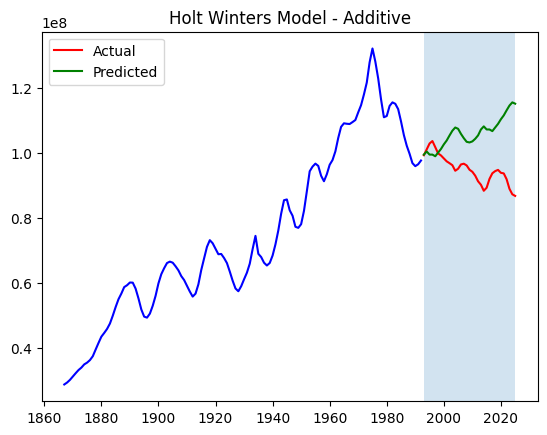

In [74]:
plt.title("Holt Winters Model - Additive")
plt.plot(train.index, train['Value'] , color = 'blue')
plt.plot(test.index, test['Value'], color = 'red', label = "Actual")
plt.plot(predict.index, predict['Value'], color = 'green', label = 'Predicted')
plt.legend()
plt.axvspan(test.index[0], test.index[-1], alpha = 0.2)
plt.show()

In [75]:
test_decomposition = STL(test['Value'], period=20).fit()
pred_decomposition = STL(predict['Value'], period=20).fit()

test_seasonal = test_decomposition.seasonal
pred_seasonal = pred_decomposition.seasonal

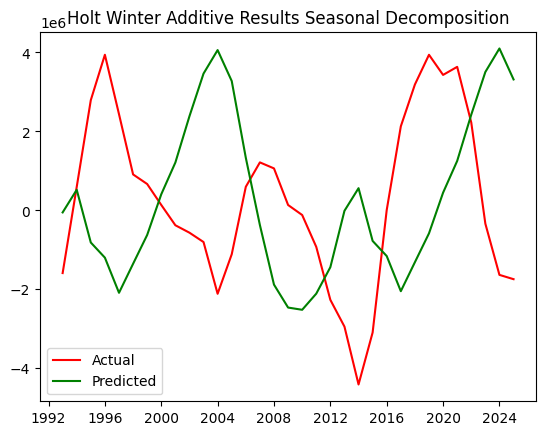

In [76]:
plt.title("Holt Winter Additive Results Seasonal Decomposition")
plt.plot(test_seasonal, color = 'red', label = "Actual")
plt.plot(pred_seasonal, color = 'green', label = "Predicted")
plt.legend()
plt.show()


In [77]:
test_seasonal.shape

(33,)

In [78]:
import statsmodels.tools.eval_measures as measures
measures.rmse(test_seasonal.values,pred_seasonal.values)

np.float64(3341418.3191642254)

In [79]:
measures.rmspe(test_seasonal.values,pred_seasonal.values)

np.float64(346.0006370223727)

In [80]:
import scipy.signal as signal
test_peaks = signal.find_peaks(test_seasonal)
pred_peaks = signal.find_peaks(-pred_seasonal)


In [81]:
pred_peaks[0]

array([ 4, 17, 24])

In [82]:
test_peaks

(array([ 3, 14, 26, 28]), {})

In [83]:
fpi=pred_peaks[0][0]
corr_test=test_seasonal.values[:-fpi]
corr_pred=pred_seasonal.values[fpi:]


In [84]:
fpi

np.int64(4)

In [85]:
test_seasonal[test_peaks[0]]

C:\Users\17866\AppData\Local\Temp\ipykernel_17700\345519163.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_seasonal[test_peaks[0]]


Year
1996-01-01    3.941728e+06
2007-01-01    1.214953e+06
2019-01-01    3.941298e+06
2021-01-01    3.635538e+06
Name: season, dtype: float64

In [86]:
test_seasonal[:-fpi].shape

(29,)

In [87]:
pred_seasonal[fpi:].shape

(29,)

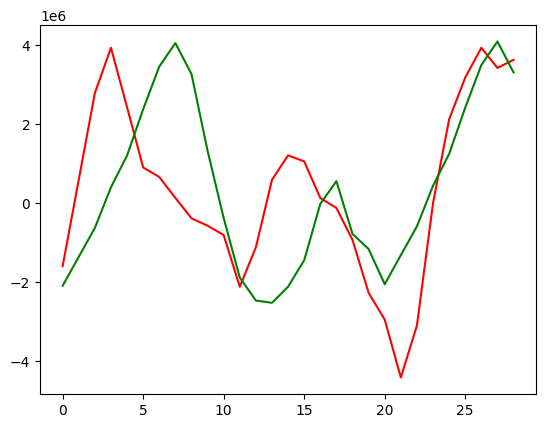

In [88]:
x = range(len(corr_pred))
plt.figure()
plt.plot(x,corr_test,color="red",label="test")
plt.plot(x,corr_pred,color="green",label="pred")
plt.show()

In [89]:
measures.rmspe(corr_test,corr_pred)

np.float64(150.230603964379)

In [90]:
model_holt_winters = ExponentialSmoothing(train["Value"], trend='mul', seasonal='mul', seasonal_periods=20)\
    .fit(optimized=True)
forecasts_holt_winters_mul = model_holt_winters.forecast(len(test))

In [93]:
corr_pred_peaks = corr_pred[signal.find_peaks(corr_pred)[0]]
corr_test_peaks = corr_test[signal.find_peaks(corr_test)[0]]
measures.rmspe(corr_pred_peaks,corr_test_peaks)

np.float64(6.722377019610894)

In [41]:
predict = test.copy(deep=True)
predict['Value'] = forecasts_holt_winters_mul

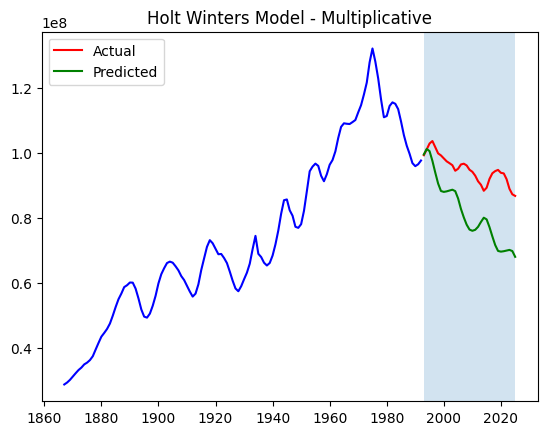

In [34]:
plt.title("Holt Winters Model - Multiplicative")
plt.plot(train.index, train['Value'] , color = 'blue')
plt.plot(test.index, test['Value'], color = 'red', label = "Actual")
plt.plot(predict.index, predict['Value'], color = 'green', label = 'Predicted')
plt.legend()
plt.axvspan(test.index[0], test.index[-1], alpha = 0.2)
plt.show()

In [42]:
test_decomposition = STL(test['Value'], period=20).fit()
pred_decomposition = STL(predict['Value'], period=20).fit()

test_seasonal = test_decomposition.seasonal
pred_seasonal = pred_decomposition.seasonal

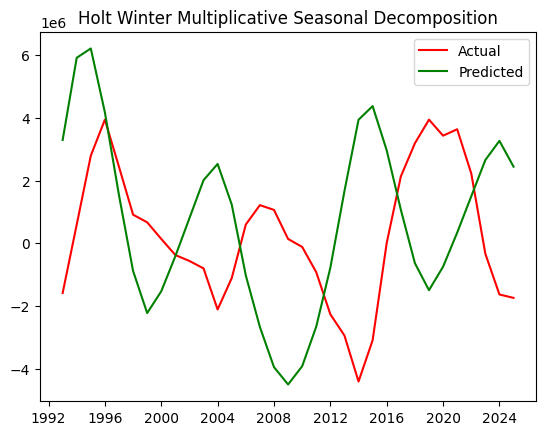

In [43]:
plt.title("Holt Winter Multiplicative Seasonal Decomposition")
plt.plot(test_seasonal, color = 'red', label = "Actual")
plt.plot(pred_seasonal, color = 'green', label = "Predicted")
plt.legend()
plt.show()

In [47]:
corr_test=test_seasonal[2:]
corr_pred=pred_seasonal[:-2]

In [48]:
measures.rmspe(test_seasonal,pred_seasonal)

np.float64(871.6152314636716)

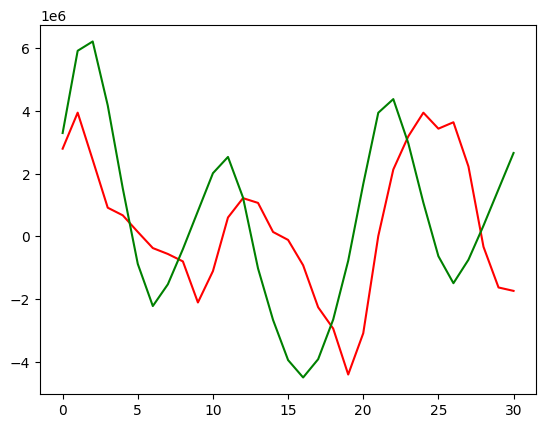

In [49]:
x = range(len(corr_pred))
plt.figure()
plt.plot(x,corr_test,color="red",label="test")
plt.plot(x,corr_pred,color="green",label="pred")
plt.show()

In [50]:
measures.rmspe(corr_test,corr_pred)

np.float64(1192.190033175693)

In [58]:
corr_pred_peaks = corr_pred[signal.find_peaks(corr_pred)[0]]
corr_test_peaks = corr_test[signal.find_peaks(corr_test)[0]]
measures.rmspe(corr_pred_peaks,corr_test_peaks[:-1])

C:\Users\17866\AppData\Local\Temp\ipykernel_17700\519780702.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  corr_pred_peaks = corr_pred[signal.find_peaks(corr_pred)[0]]
C:\Users\17866\AppData\Local\Temp\ipykernel_17700\519780702.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  corr_test_peaks = corr_test[signal.find_peaks(corr_test)[0]]


np.float64(3.7118447553088223)